In [32]:
import os, sys
import numpy as np
import pandas as pd
import pickle
import torch
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
os.chdir('..')
os.getcwd()


'C:\\Users\\Ben\\Documents\\UMass\\Fall2019\\CS691\\691_project'

In [21]:
with open('scripts/experiment_1_sl50_no_ratings_mask_pct10/history_movie_pretrain_no_ratings_50_9.pickle', 'rb') as f:
    exp1 = pickle.load(f)
with open('scripts/experiment_2_sl2_no_ratings_mask_pct50/history_movie_pretrain_no_ratings_2.pickle', 'rb') as f:
    exp2 = pickle.load(f)
with open('scripts/experiment_3_sl50_with_ratings_mask_pct50/history_movie_pretrain_with_ratings_50.pickle', 'rb') as f:
    exp3 = pickle.load(f)
with open('scripts/experiment_4_sl2_with_ratings_mask_pct50/history_movie_pretrain_with_ratings_2.pickle', 'rb') as f:
    exp4 = pickle.load(f)
with open('scripts/experiment_5_sl50_with_ratings_mask_pct10/history_movie_pretrain_with_ratings_50.pickle', 'rb') as f:
    exp5 = pickle.load(f)

In [29]:
exp1['masked_rating_loss'] = [-1] * 790
exp1['masked_rating_acc'] = [-1] * 790

exp2['masked_rating_loss'] = [-1] * len(exp2['masked_movie_acc'])
exp2['masked_rating_acc'] = [-1] * len(exp2['masked_movie_acc'])

In [30]:
final1 = pd.DataFrame(exp1).tail(1)
final2 = pd.DataFrame(exp2).tail(1)
final3 = pd.DataFrame(exp3).tail(1)
final4 = pd.DataFrame(exp4).tail(1)
final5 = pd.DataFrame(exp5).tail(1)


In [31]:
pd.concat([final1, final2, final3, final4, final5])

,epoch,step,masked_movie_loss,masked_rating_loss,matching_loss,loss,masked_movie_acc,masked_rating_acc,matching_acc
789,9,7799,"tensor(8.3429, device='cuda:0', requires_grad=...",-1,"tensor(0.6928, device='cuda:0', requires_grad=...","tensor(4.5179, device='cuda:0', requires_grad=...",0.002837,-1.000000,0.513672
789,9,7799,"tensor(7.9447, device='cuda:0', requires_grad=...",-1,"tensor(0.6937, device='cuda:0', requires_grad=...","tensor(4.3192, device='cuda:0', requires_grad=...",0.000000,-1.000000,0.464844
789,9,7799,"tensor(6.5034, device='cuda:0', requires_grad=...","tensor(1.5219, device='cuda:0', requires_grad=...","tensor(0.2299, device='cuda:0', requires_grad=...","tensor(2.7517, device='cuda:0', requires_grad=...",0.044914,0.366114,0.914062
789,9,7799,"tensor(8.1100, device='cuda:0', requires_grad=...","tensor(1.7717, device='cuda:0', requires_grad=...","tensor(0.6931, device='cuda:0', requires_grad=...","tensor(3.5249, device='cuda:0', requires_grad=...",0.000000,0.323308,0.513672
789,9,7799,"tensor(6.6140, device='cuda:0', requires_grad=...","tensor(1.5544, device='cuda:0', requires_grad=...","tensor(0.2456, device='cuda:0', requires_grad=...","tensor(2.8047, device='cuda:0', requires_grad=...",0.036757,0.348964,0.898438


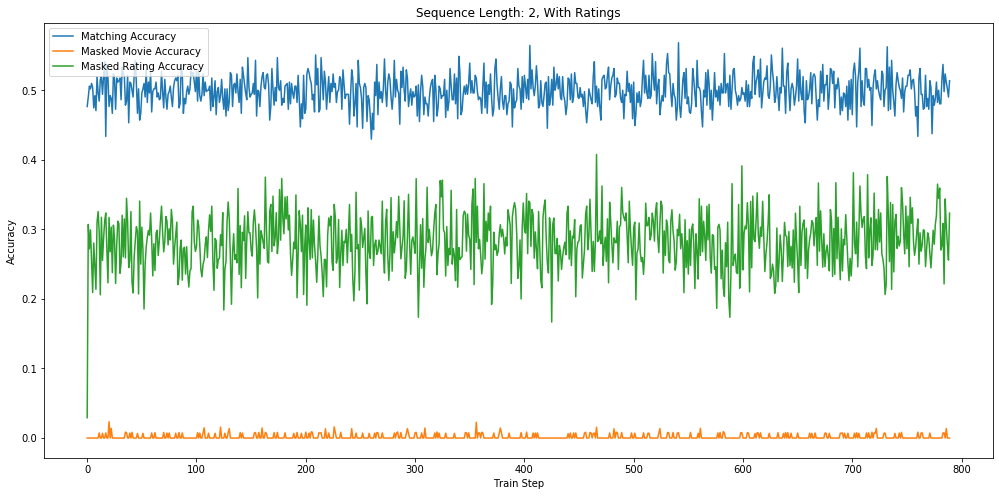

In [48]:
fig, ax = plt.subplots(figsize=(17, 8))
ax.plot(exp4['matching_acc'])
ax.plot(exp4['masked_movie_acc'])
ax.plot(exp4['masked_rating_acc'])
plt.legend(['Matching Accuracy', 'Masked Movie Accuracy', 'Masked Rating Accuracy']);
plt.xlabel('Train Step');
plt.ylabel('Accuracy');
plt.title('Sequence Length: 2, With Ratings');
plt.savefig('exp4.png')

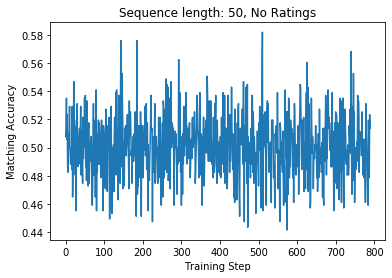

In [20]:
plt.plot(exp1['matching_acc'])
plt.title('Sequence length: 50, No Ratings');
plt.xlabel('Training Step');
plt.ylabel('Matching Accuracy');

In [8]:
with open('../scripts/experiment_5_sl50_with_ratings_mask_pct10/history_movie_pretrain_with_ratings_50.pickle', 'rb') as f:
    exp2 = pickle.load(f)

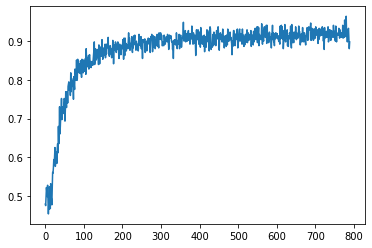

In [11]:
plt.plot(exp2['matching_acc'])

In [13]:
with open('../scripts/experiment_4_sl2_with_ratings_mask_pct50/history_movie_pretrain_with_ratings_2.pickle', 'rb') as f:
    exp3 = pickle.load(f)

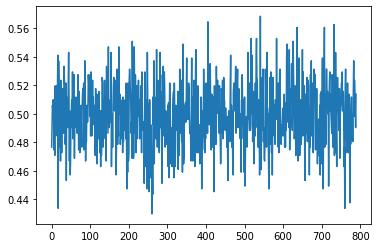

In [14]:
plt.plot(exp3['matching_acc'])

In [35]:
model = torch.load('scripts/experiment_5_sl50_with_ratings_mask_pct10/movie_pretrain_with_ratings_50.torch')

In [38]:
model.embedding_layer.weight.shape

torch.Size([20360, 256])